041824 JD

Decoding has been done on `FOV = 05`. It is done by decoding every 20 bits. Let's take a look at the data

In [121]:
save_folder ='/projects/ps-renlab2/wed009/analysis_031524_v1_acry_37C_pilot/'
analysis_folder = '/mnt/tscc/wed009/WholeGenome/NMERFISH_Jenny/'
data_folder = '/projects/ps-renlab2/wed009/031524_v1_acry_37C_pilot/'

In [16]:
import sys
sys.path.append(analysis_folder)
from ioMicro import *
fov = 'Conv_zscan__05'

# load decoded
self.XH_pruned = np.load(self.decoded_fl)['XH_pruned']

self.icodesN = np.load(self.decoded_fl)['icodesN']

self.gns_names = np.load(self.decoded_fl)['gns_names']

In [99]:
dec = decoder_simple(save_folder,fov, set_ = '')
dec.load_decoded()

Loaded decoded: -6.631021499633789


True

## double check the code book is actually in set of 20

In [100]:
# compute the codebook to loci x bits
dec.load_library(lib_fl = os.path.join(analysis_folder, 'JennyV1Codebook_blank.csv'), 
                 nblanks = -1)

In [39]:
codebook = np.array(dec.codes_01[dec.good_gns, :])

In [45]:
np.all(np.all((codebook // 20) == (codebook // 20)[:, [0]], axis=1)) # //20 groups them in block of 20

True

Yes, the code are indeed of 5 blocks. Each block has 20 total bits, 4 on bits.

# QC

check number of molecules per loci

## test: remove any bit that is NA

In [72]:
# test subset only bits with for sure 4 on bits
dec.XH_pruned_full = dec.XH_pruned
dec.XH_pruned = dec.XH_pruned[~np.any(np.isnan(dec.XH_pruned), axis=(1, 2))]
dec.icodesN = dec.icodesN[~np.any(np.isnan(dec.XH_pruned_full), axis=(1, 2))]

In [65]:
dec.XH_pruned.shape #before

(8234885, 4, 10)

In [73]:
dec.XH_pruned.shape # after

(1577508, 4, 10)

In [95]:
np.any(dec.icodesN > 595)

False

It doesn't quick work because it will remove all blank code.

## end of test

# quick cell segmentation

In [124]:
new_segmentation(fl =os.path.join(data_folder, 'H1_P1_A1_2_3','Conv_zscan__05.zarr'),
                     psf_file = os.path.join(analysis_folder, 'psfs','psf_750_Scope4_final.npy'),
                     p1=-500,p99=1500,mean_dapi = None,sdapi = 100,
                    save_folder = save_folder,redo=False,plt_val=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:06<00:00,  5.52it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25.3M/25.3M [00:05<00:00, 5.09MB/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5.23k/5.23k [00:00<00:00, 11.2MB/s]


'/projects/ps-renlab2/wed009/analysis_031524_v1_acry_37C_pilot//Segmentation/Conv_zscan__05--H1_P1_A1_2_3--dapi_segm.npz'

In [127]:
dec.fl_dapi = '/projects/ps-renlab2/wed009/analysis_031524_v1_acry_37C_pilot//Segmentation/Conv_zscan__05--H1_P1_A1_2_3--dapi_segm.npz'
dic = np.load(dec.fl_dapi)
im_segm = dic['segm']
dec.shape = dic['shape']
dec.im_segm_=im_segm

In [129]:
len(np.unique(dec.im_segm_)) - 1

536

# plot num molecules per gene

In [119]:
def plot_molecules_per_gene(dec):
    if hasattr(dec,'im_segm_'):
        ncells = len(np.unique(dec.im_segm_))-1
    else:
        ncells = 1
        
    icds,ncds = np.unique(dec.icodesN,return_counts=True)
    good_igns = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' not in gn.lower()]
    kp = np.in1d(icds,good_igns)
    ncds = ncds/ncells
    plt.figure()
    plt.xlabel('Genes')
    plt.plot(icds[kp],ncds[kp],label='genes')
    plt.plot(icds[~kp],ncds[~kp],label='blank')
    plt.ylabel('Number of molecules in the fov')
    plt.title(str(np.round(np.mean(ncds[~kp])/np.mean(ncds[kp]),3)))
    plt.legend()

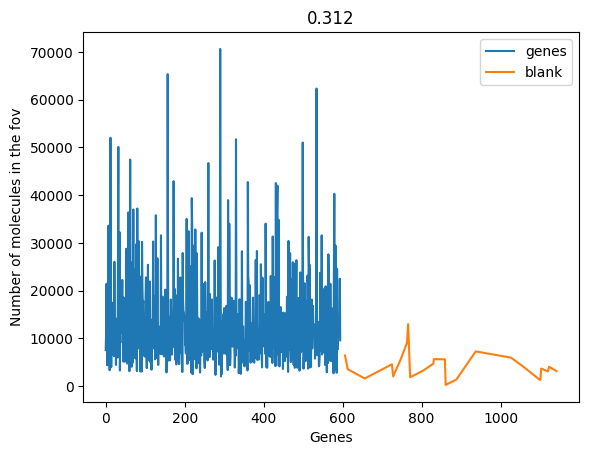

In [120]:
plot_molecules_per_gene(dec)

In [102]:
dec.icodesN

8234885

In [111]:
icds,ncds = np.unique(dec.icodesN,return_counts=True)
good_igns = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' not in gn.lower()]
kp = np.in1d(icds,good_igns)

In [116]:
np.sum(ncds[kp]) / 8000

8132390

In [109]:
dec.icodesN(dec.good_gns)

SyntaxError: invalid syntax (1557687528.py, line 1)

In [85]:
dec.load_library(lib_fl = os.path.join(analysis_folder, 'JennyV1Codebook_blank.csv'), 
                 nblanks = -1)

In [86]:
dec.ncols=3
scoresRef = get_score_per_color(dec) # returning NA??

In [89]:
len(scoresRef)

3

/home/wed009/miniconda3/envs/cellpose/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


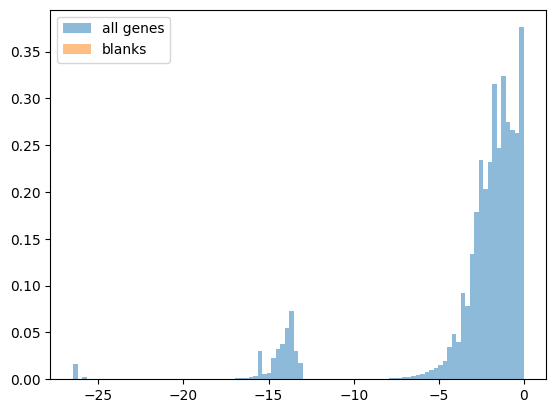

In [94]:
get_score_withRef(dec,scoresRef,plt_val=True,gene=None,iSs = None)

/home/wed009/miniconda3/envs/cellpose/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wed009/miniconda3/envs/cellpose/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


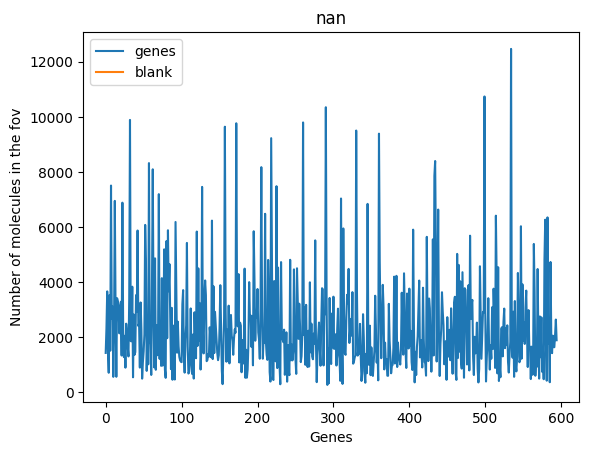

In [98]:
dec.th = -10
plot_statistics(dec)

array([107, 360, 310, ..., 182, 182, 182])